# Classificação de imagens usando Redes Neurais Convolucionais (CNN)

## Setup

In [93]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

os.environ["KERAS_BACKEND"] = "tensorflow"

# Note that Keras should only be imported after the backend
# has been configured. The backend cannot be changed once the
# package is imported.
import keras
from keras import layers, regularizers
import tensorflow as tf

## Carregamento dos Dados

In [84]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
print('Formato dos dados de treinamento:' + str(x_train.shape))
print('Formato dos rótulos de treinamento:' + str(y_train.shape))
print('Formato dos dados de teste:' + str(x_test.shape))
print('Formato dos rótulos de teste:' + str(y_test.shape))

Formato dos dados de treinamento:(60000, 28, 28)
Formato dos rótulos de treinamento:(60000,)
Formato dos dados de teste:(10000, 28, 28)
Formato dos rótulos de teste:(10000,)


## Amostra dos Dados

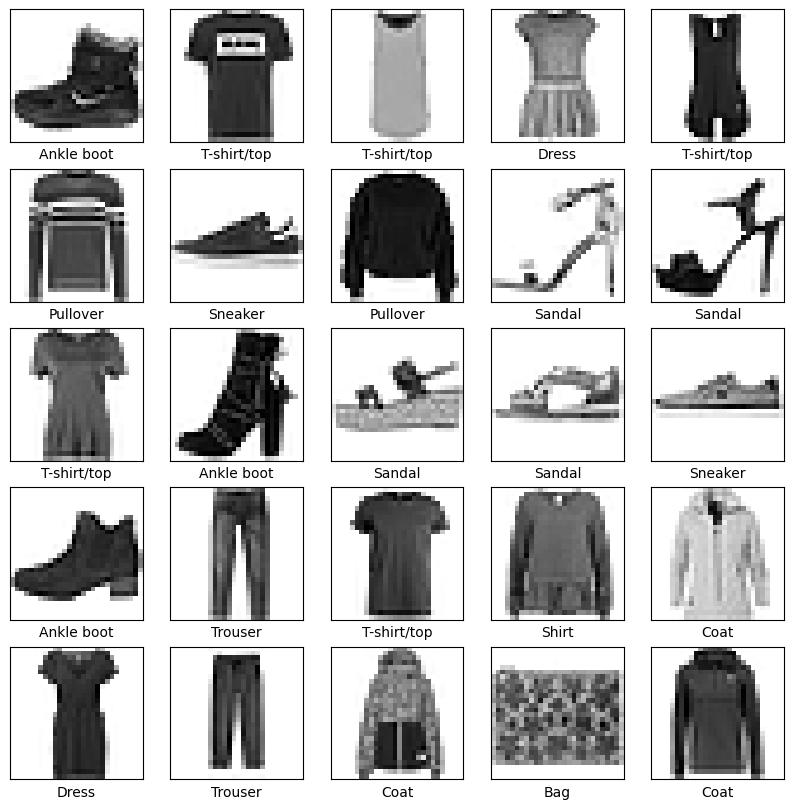

In [85]:
# Class names in the Fashion MNIST dataset according to docs
# https://keras.io/api/datasets/fashion_mnist/
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

## Pré-Processamento: Normalização

In [86]:
# Normalizar os pixels para ficarem entre 0 e 1
# Isso ajuda na convergência do modelo
# e melhora desempenho
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

## Pré-Processamento: Transformação

In [87]:
# Adicionar uma dimensão de "canal" para a CNN (de 28x28 para 28x28x1)
# A CNN espera uma entrada 3D (altura, largura, canais)
# Cada pixel agora é representado por um vetor com 1 valor (tons de cinza)
# Se fosse RGB, seriam 3 valores (vermelho, verde, azul)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Transformar os rótulos em vetores "one-hot" (ex: 5 -> [0,0,0,0,1,0,0,0,0,0])
# Isso é necessário para a loss 'categorical_crossentropy'
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

## Topologia da Rede CNN

In [ ]:
cnn = keras.Sequential(
    [
        layers.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.GlobalAveragePooling2D(),
        layers.Dropout(0.1),
        layers.Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dense(10, activation='softmax'),
    ]
)

cnn.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 100)            │         6,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 72,502 (283.21 KB)

 Trainable params: 72,502 (283.21 KB)

 Non-trainable params: 0 (0.00 B)

## Compilação da CNN

In [89]:
cnn.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
            loss=keras.losses.CategoricalCrossentropy(),
            metrics=[keras.metrics.CategoricalAccuracy(name="acc")])

## Treinamento

In [90]:
history = cnn.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.1)

print("\nAvaliando o modelo nos dados de teste...")
score = cnn.evaluate(x_test, y_test, batch_size=32)
print(f"Perda (Loss) no teste: {score[0]}")
print(f"Acurácia no teste: {score[1]}")

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 34s 19ms/step - acc: 0.6939 - loss: 0.8428 - val_acc: 0.7913 - val_loss: 0.5863
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - acc: 0.8109 - loss: 0.5435 - val_acc: 0.8430 - val_loss: 0.4526
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - acc: 0.8448 - loss: 0.4481 - val_acc: 0.8673 - val_loss: 0.3828
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - acc: 0.8629 - loss: 0.3980 - val_acc: 0.8775 - val_loss: 0.3490
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - acc: 0.8753 - loss: 0.3635 - val_acc: 0.8855 - val_loss: 0.3319
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - acc: 0.8843 - loss: 0.3400 - val_acc: 0.8907 - val_loss: 0.3186
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - acc: 0.8905 - loss: 0.3196 - val_acc: 0.8945 - val_loss: 0.3109
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - acc: 0.8953 - loss: 0.3058 - val_acc: 0.9015 - val_loss: 0.2861
Epoch 9/10
1688/1688 ━━━

## Avaliação de Resultados

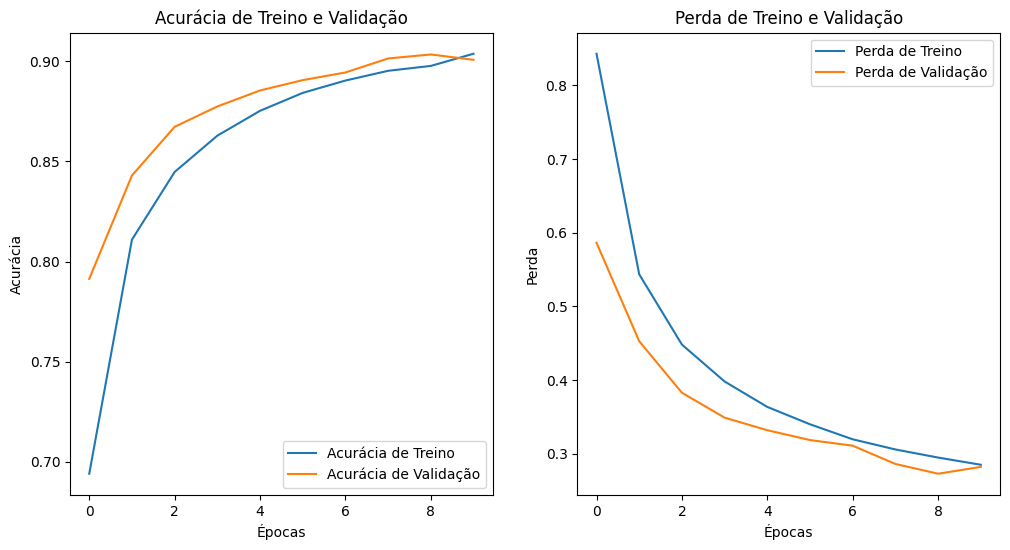

In [91]:
# Resgatar o histórico de acurácia e perda
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

# Criar a figura com os dois gráficos
plt.figure(figsize=(12, 6))

# Gráfico da Acurácia
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Acurácia de Treino')
plt.plot(epochs_range, val_acc, label='Acurácia de Validação')
plt.legend(loc='lower right')
plt.title('Acurácia de Treino e Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')

# Gráfico da Perda (Loss)
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Perda de Treino')
plt.plot(epochs_range, val_loss, label='Perda de Validação')
plt.legend(loc='upper right')
plt.title('Perda de Treino e Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


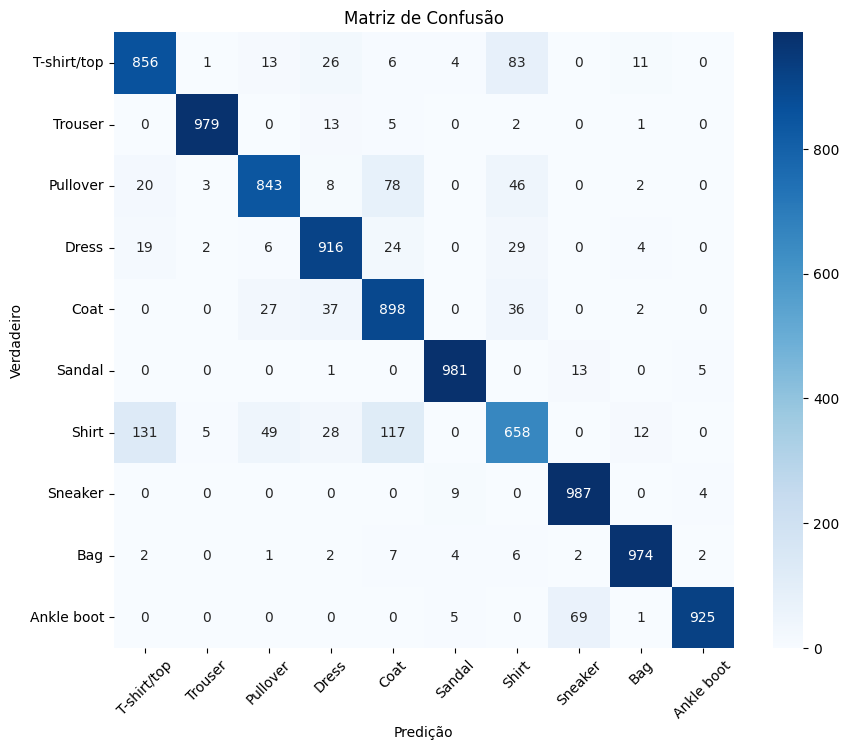

In [94]:
# 1. Gerar as previsões do modelo no conjunto de teste

predictions = cnn.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

# 2. Obter os rótulos verdadeiros (converter de one-hot para número da classe)
true_labels = np.argmax(y_test, axis=1)

# 3. Calcular a matriz de confusão
cm = tf.math.confusion_matrix(labels=true_labels, predictions=predicted_labels)

# 4. Plotar a matriz de confusão de forma visual
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predição')
plt.ylabel('Verdadeiro')
plt.xticks(ticks=np.arange(10) + 0.5, labels=class_names, rotation=45)
plt.yticks(ticks=np.arange(10) + 0.5, labels=class_names, rotation=0)
plt.title('Matriz de Confusão')
plt.show()